### Jupyter Notebook to generate a matrix of genotypes with cultivated and wild populations

#### We used here: 
#### 1. A Senegalese spatial dataset composed of 126 cultivated samples 
#### 2. An African dataset with 47 wild samples from Senegal and Mauritanie (Western Africa), and Mali and Niger (Central Africa)
#### We used the SNPs identified as contributing the most to a deviant population structure on a region of chr3 (101-189 Mb) found in the spatial cultivated population, resulting from a previous analysis (see Analysis of the candidate regions)
#### This region of chromosome 3 likely harbors a large structural variant in the cultivated population 
#### The aim was to visualize the genotypes of these SNPs in the wild population, to test the hypothesis that the variant might have been intogressed

## --------------------------------------------------------------

### 1. This part consists in combining the two VCF files for the candidate region and the outlier SNPs

#### List of the SNPs identified on chr3 as contributing the most to the local population structure of the spatial dataset
(see structural_variants_analysis_pearl_millet/matrix_of_genotypes/tables_genotypes.R)

In [3]:
outlier_SNPs_PCAdapt_analysis="SNPs_outliers_spatial_dataset_chr3_101-189Mb.txt"

In [7]:
# obtention of the position of the outlier SNPs identified with the spatial dataset

list_pos=[]
with open(outlier_SNPs_PCAdapt_analysis, "r", encoding="utf8", errors='ignore') as v :
        for line in v :
            e=line.split("\t")
            if str(e[0][0]) != "c": 
                pos=e[0]
                list_pos.append(pos)
print(len(list_pos))

238


#### VCF file with the wild samples from Senegal, Mauritanie, Mali and Niger, ordered following the countries

In [9]:
vcf_wild_samples="WILD_samples_MAURITANIE_SENEGAL_MALI_NIGER_ordered.vcf"

In [11]:
list_pos_common=[]
list_ref_wild=[]
list_alt_wild=[]
with open(vcf_wild_samples, "r", encoding="utf8", errors='ignore') as v :
        for line in v :
            e=line.split("\t")
            c=e[0]
            if str(e[0][0]) != "#" and str(c)=="chr3": 
                pos=e[1]
                if str(pos) in list_pos:
                    list_pos_common.append(pos)
                    ref_wild=e[3]
                    list_ref_wild.append(ref_wild)
                    alt_wild=e[4]
                    list_alt_wild.append(alt_wild)
                    
print(len(list_pos_common))

158


#### VCF file of the spatial dataset corresponding to the candidate region of chromosome 3 and with the samples ordered following the distinct clusters of samples identified in the population

In [13]:
vcf_spatial_dataset="spatial_dataset_chr3_101-189Mb_ordered.vcf"

In [15]:
list_pos_spatial=[]
list_ref_spatial=[]
list_alt_spatial=[]
with open(vcf_spatial_dataset, "r", encoding="utf8", errors='ignore') as v :
        for line in v :
            e=line.split("\t")
            c=e[0]
            if str(e[0][0]) != "#" and str(c)=="chr3": 
                pos=e[1]
                if str(pos) in list_pos_common:
                    list_pos_spatial.append(pos)
                    ref_cerao=e[3]
                    list_ref_spatial.append(ref_cerao)
                    alt_cerao=e[4]
                    list_alt_spatial.append(alt_cerao)
                    
print(len(list_pos_spatial))

158


#### Check if all REF and ALT alleles are the same in the two datasets:

In [27]:
count_ref=0
count_alt=0
for i in range(0, len(list_alt_spatial)):
    if str(list_alt_wild[i]) == str(list_alt_spatial[i]):
        count_alt+=1
        #print(i, list_alt_wild[i], ist_alt_spatial[i])
    if str(list_ref_wild[i]) == str(list_ref_spatial[i]):
        count_ref+=1
        #print(i, list_ref_wild[i], ist_ref_spatial[i])
print(count_ref, count_alt)

158 158


#### Generate a Dictionary with the genotypes of the wild samples

In [53]:
dico={}
with open(vcf_wild_samples, "r", encoding="utf8", errors='ignore') as v2 :
        for line in v2 :
            e=line.split("\t")
            c=e[0]
            if str(e[0][0]) != "#" and str(c)=="chr3": 
                pos=e[1]
                if str(pos) in list_pos_common: 
                    dico[pos]=[]
                    for i in range(9,56):
                        genotype=e[i]
                        dico[pos].append(genotype)
for k in dico:
    print(len(dico[k]))
    break
print(len(dico))

47
158


#### Combine the two VCF files:

In [60]:
combined_vcf_spatial_wild="combined_wild_spatial_dataset_chr3_101-189Mb.vcf"

In [69]:
with open(combined_vcf_spatial_wild, "w") as fileR:
    with open(vcf_spatial_dataset, "r", encoding="utf8", errors='ignore') as v :
        for line in v :
            e=line.split("\t")
            if str(e[0][0]) != "#": 
                chromosome=e[0]
                pos=str(e[1])
                line=line[:-1]
                if str(chromosome) == "chr3" and str(pos) in list_pos_common: 
                    fileR.write(line)
                    for geno in dico[pos]:
                        fileR.write("\t"+str(geno))

### 2. This part of the script consists in generating the matrix of genotypes with the combined VCF with cultivated and wild samples:

#### To obtain the matrix, and generate a panda dataframe:

In [70]:
nb_snp=0
nb_columns=182
output_matrix_geno="matrix"
with open(output_matrix_geno, "w") as fmatrix:
    with open(combined_vcf_spatial_wild, "r", encoding="utf8", errors='ignore') as vcfFile :
        for line in vcfFile :
            e=line.split("\t")
            if str(e[0]) == "#CHROM": 
                nb_columns=len(e)
                nb_samples=int(nb_columns)-9
            if line[0]!="#":
                nb_snp+=1
                for i in range(9,int(nb_columns)):
                    infos=e[i]
                    genotypeSearch=infos.split(":")
                    geno=genotypeSearch[0]
                    if str(geno)=="./.":
                        geno=1.0
                    if str(geno)=="0/1" or str(geno)=="0|1":
                        geno=3.0
                    if str(geno)=="1/1" or str(geno)=="1|1":
                         geno=2.0
                    if str(geno)=="0/0" or str(geno)=="0|0":
                           geno=4.0
                    if int(i) < (int(nb_columns)-1):
                        fmatrix.write(str(geno)+"\t")
                    if int(i) == (int(nb_columns)-1):
                        fmatrix.write(str(geno))
            fmatrix.write("\n")
print(nb_snps)

158


In [71]:
import pandas as pd
data = pd.read_csv(output_matrix_geno, sep="\t", header=None)
data = data.transpose()

#### To obtain x axis labels for the matrix of genotypes:

In [72]:
output_index_pos_SNPs_outliers="matrix_pos"
with open(output_index_pos_SNPs_outliers, "w") as fR:
    fR.write("chr\tnb\tpos\n")
    with open(combined_vcf_spatial_wild, "r", encoding="utf8", errors='ignore') as vcfFile :
        for line in vcfFile :
            e=line.split("\t")
            if str(e[0][0]) != "#": 
                chromosome=e[1]
                position=e[2]
                fR.write(str(chromosome)+"\t"+str(c)+"\t"+str(position)+"\n")

In [73]:
list_pos_SNPs_matrix_sep=[]
c=0
with open(output_index_pos_SNPs_outliers, "r") as f:
    for line in f:
        e=line.split("\t")
        if str(e[0])!="chr":
            c+=1
            position_SNP=e[0]
            new_pos=round((int(position_SNP)/1000000),1)
            if c==1:
                list_pos_SNPs_matrix_sep.append(new_pos)
            if c==int(nb_snps): 
                list_pos_SNPs_matrix_sep.append(new_pos) 
            if c%15 == 0:
                list_pos_SNPs_matrix_sep.append(new_pos)
            else:
                if c!=1 and c!= int(nb_snps):
                    list_pos_SNPs_matrix_sep.append("")
                
x_axis_labels = list_pos_SNPs_matrix_sep

#### To obtain the matrix:

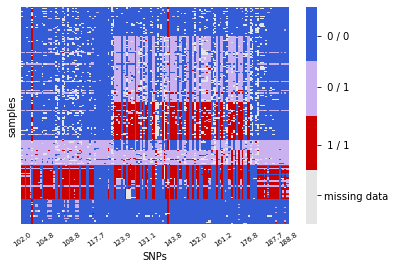

In [74]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

nb_samples=173

myColors = ((0.0, 0.0, 0.0, 0.1), (0.8, 0.0, 0.0, 1.0), (0.3, 0.0, 0.8, 0.30), (0.0, 0.2, 0.8, 0.8))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
heat_map = sb.heatmap(data,cmap=cmap,yticklabels=False,xticklabels=x_axis_labels) #,cmap="Blues"
heat_map.tick_params(left=False, bottom=False)
colorbar = heat_map.collections[0].colorbar
colorbar.set_ticks([1.4, 2.1, 2.9, 3.6])
colorbar.set_ticklabels(['missing data', ' 1 / 1', ' 0 / 1',' 0 / 0'])

heat_map.set_ylabel("samples")
heat_map.set_xlabel('SNPs')
heat_map.set_xticklabels(x_axis_labels, rotation = 35, fontsize = 7)

heat_map.figure.savefig("img/matrix_genotypes_spatial_wild_datasets.png",dpi=600)


In [75]:
import os

os.system("rm matrix")
os.system("rm matrix_pos")

0